In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import time

import matplotlib.pyplot as plt

### Задание 1.1

### Парсинг топ 10 стран в топе

In [2]:
df = pd.DataFrame(columns=['data', 'rank', 'name', 'power', 'country'])

url = 'https://top500.org/lists/top500/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Находим блок с идентификатором squarelist
squarelist_block = soup.find('ul', id='squarelist')

# Если блок найден, ищем все ссылки внутри него
if squarelist_block:
    links = squarelist_block.find_all('a')
    # проходимся по каждому году, собираем данные
    i = 0

    for link in links:
        href = link.get('href')
        URL = f'{url}{href}'

        i += 1

        response_year = requests.get(URL)
        soup_year = BeautifulSoup(response_year.text, 'html.parser')

        # Находим все строки таблицы
        rows = soup_year.find_all('tr')

        print(href)

        data = f'{href}/01'
        # Проходимся по каждой строке таблицы, кроме первой, так как она содержит заголовки столбцов
        for row in rows[1:]:
            #print(row)
            cells = row.find_all('td')
            rank = cells[0].text.strip()  # Ранг компьютера

            if cells[1].find('b'):
                name = cells[1].find('b').text.strip()  # Название компьютера

            else:
                name = None

            country = list(cells[1].find_all('br'))

            if country is not None:

                country1 = str(country[0]).split('<br/>')[1]
                country1 = re.sub(r'\n', '', country1.strip('</br>').strip())

            else:
                print("Страна не найдена")

            power = cells[2].text.strip()  # Мощность компьютера

            characteristics = {'data': data,
                               'rank': rank,
                               'name': name,
                               'power': power,
                               'country': country1}

            print(f'{data} - {rank} - {name} - {power} - {country1} ')

            df = df._append(characteristics, ignore_index=True)


        if i > 21:
            break
else:
    print("Блок squarelist не найден на странице.")



2023/11
2023/11/01 - 1 - Frontier - 8,699,904 -  
2023/11/01 - 2 - Aurora - 4,742,808 - United States 
2023/11/01 - 3 - Eagle - 1,123,200 - United States 
2023/11/01 - 4 - Supercomputer Fugaku - 7,630,848 - Japan 
2023/11/01 - 5 - LUMI - 2,752,704 - Finland 
2023/11/01 - 6 - Leonardo - 1,824,768 - Italy 
2023/11/01 - 7 - Summit - 2,414,592 - United States 
2023/11/01 - 8 - MareNostrum 5 ACC - 680,960 - Spain 
2023/11/01 - 9 - Eos NVIDIA DGX SuperPOD - 485,888 - United States 
2023/11/01 - 10 - Sierra - 1,572,480 - United States 
2023/06
2023/06/01 - 1 - Frontier - 8,699,904 - United States 
2023/06/01 - 2 - Supercomputer Fugaku - 7,630,848 - Japan 
2023/06/01 - 3 - LUMI - 2,220,288 - Finland 
2023/06/01 - 4 - Leonardo - 1,824,768 - Italy 
2023/06/01 - 5 - Summit - 2,414,592 - United States 
2023/06/01 - 6 - Sierra - 1,572,480 - United States 
2023/06/01 - 7 - Sunway TaihuLight - 10,649,600 - China 
2023/06/01 - 8 - Perlmutter - 761,856 - United States 
2023/06/01 - 9 - Selene - 555,520

2015/11
2015/11/01 - 1 - Tianhe-2A - 3,120,000 -  
2015/11/01 - 2 - Titan - 560,640 - United States 
2015/11/01 - 3 - Sequoia - 1,572,864 - United States 
2015/11/01 - 4 - None - 705,024 - Japan 
2015/11/01 - 5 - Mira - 786,432 - United States 
2015/11/01 - 6 - Trinity - 301,056 - United States 
2015/11/01 - 7 - Piz Daint - 115,984 - Switzerland 
2015/11/01 - 8 - Hazel Hen - 185,088 - Germany 
2015/11/01 - 9 - Shaheen II - 196,608 - Saudi Arabia 
2015/11/01 - 10 - Stampede - 462,462 - United States 
2015/06
2015/06/01 - 1 - Tianhe-2A - 3,120,000 -  
2015/06/01 - 2 - Titan - 560,640 - United States 
2015/06/01 - 3 - Sequoia - 1,572,864 - United States 
2015/06/01 - 4 - None - 705,024 - Japan 
2015/06/01 - 5 - Mira - 786,432 - United States 
2015/06/01 - 6 - Piz Daint - 115,984 - Switzerland 
2015/06/01 - 7 - Shaheen II - 196,608 - Saudi Arabia 
2015/06/01 - 8 - Stampede - 462,462 - United States 
2015/06/01 - 9 - JUQUEEN - 458,752 - Germany 
2015/06/01 - 10 - JUQUEEN - 458,752 - Germany

In [3]:
df

,data,rank,name,power,country
0,2023/11/01,1,Frontier,"8,699,904",
1,2023/11/01,2,Aurora,"4,742,808",United States
2,2023/11/01,3,Eagle,"1,123,200",United States
3,2023/11/01,4,Supercomputer Fugaku,"7,630,848",Japan
4,2023/11/01,5,LUMI,"2,752,704",Finland
...,...,...,...,...,...
215,2013/06/01,6,Stampede,"462,462",United States
216,2013/06/01,7,JUQUEEN,"458,752",Germany
217,2013/06/01,8,JUQUEEN,"458,752",Germany
218,2013/06/01,9,Vulcan,"393,216",United States


In [4]:
df.fillna('United States', inplace=True)
df['country'] = df['country'].apply(lambda country: 'United States' if len(country) < 2 else country)
df

,data,rank,name,power,country
0,2023/11/01,1,Frontier,"8,699,904",United States
1,2023/11/01,2,Aurora,"4,742,808",United States
2,2023/11/01,3,Eagle,"1,123,200",United States
3,2023/11/01,4,Supercomputer Fugaku,"7,630,848",Japan
4,2023/11/01,5,LUMI,"2,752,704",Finland
...,...,...,...,...,...
215,2013/06/01,6,Stampede,"462,462",United States
216,2013/06/01,7,JUQUEEN,"458,752",Germany
217,2013/06/01,8,JUQUEEN,"458,752",Germany
218,2013/06/01,9,Vulcan,"393,216",United States


In [5]:
df_top = df.groupby(['country']).count().sort_values('power',ascending=False)
df_top

,data,rank,name,power
country,,,,
United States,120,120,120,120
China,27,27,27,27
Japan,22,22,22,22
Germany,19,19,19,19
Switzerland,14,14,14,14
Italy,8,8,8,8
Finland,4,4,4,4
Saudi Arabia,4,4,4,4
France,1,1,1,1


### 1) Какие страны в последние 10 лет имели больше всего компьютеров, входящих в ТОП500

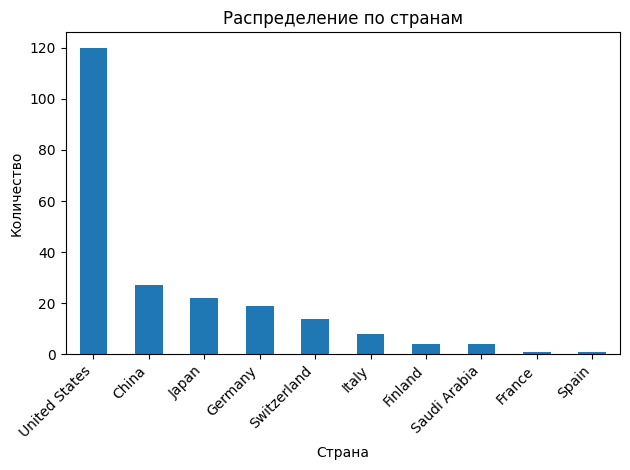

In [6]:
# Распредление количества стран, которые входили в топ 10 каждый  квартал

# Строим гистограмму для одного из столбцов, так как все столбцы имеют одинаковые значения
df_top['data'].plot(kind='bar')

plt.title('Распределение по странам')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()

# Показываем график
plt.show()

### 2) Сколько сейчас суперкомпьютеров, входящих в ТОП500, в России.

### Россия: 7 

### Задание 1.2

In [7]:
html_code_2023 = """
<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Research</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">745,233,914</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,012,174,289</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">15,949,680</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Benchmarking</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">111,432,960</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">146,818,221</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">779,232</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Cloud Services</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">50,360,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">70,080,460</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">459,296</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Software</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">75,000,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">107,489,360</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">406,304</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">IT Services</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">50,360,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">70,080,460</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">459,296</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Weather and Climate Research</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">23,204,360</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">38,222,016</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">419,840</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Energy</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">8,076,380</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12,731,972</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">149,776</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Finance</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,087,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,344,190</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,768</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Not Specified</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">70,870,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">93,750,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">761,856</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">CFD</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,087,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,344,190</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,768</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Biology</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,087,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,344,190</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,768</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Medicine</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,087,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,344,190</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,768</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Economics</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,087,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,344,190</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,768</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Information Service</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">63,460,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">79,215,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">555,520</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Geophysics</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,087,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,344,190</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,768</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">16</td><td colspan="1" class="google-visualization-table-td">Aerospace</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,951,550</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7,107,149</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">241,108</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">17</td><td colspan="1" class="google-visualization-table-td">Chemistry</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9,087,000</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">19,344,190</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">96,768</td></tr></tbody>
"""

html_code_2013 = """<tbody><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">1</td><td colspan="1" class="google-visualization-table-td">Research</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">73</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">14.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">63,622,221</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">80,500,699</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">5,855,899</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">2</td><td colspan="1" class="google-visualization-table-td">Weather and Climate Research</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">12</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,953,164</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">4,893,207</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">320,548</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">3</td><td colspan="1" class="google-visualization-table-td">Energy</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">9</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.8</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,614,198</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,341,400</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">216,868</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">4</td><td colspan="1" class="google-visualization-table-td">Defense</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">7</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,657,634</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3,221,065</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">313,440</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">5</td><td colspan="1" class="google-visualization-table-td">Benchmarking</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,193,002</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,749,083</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">109,392</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">6</td><td colspan="1" class="google-visualization-table-td">Aerospace</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1,597,500</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2,149,228</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">162,204</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">7</td><td colspan="1" class="google-visualization-table-td">Environment</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">3</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.6</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">731,050</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">885,441</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">43,984</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">8</td><td colspan="1" class="google-visualization-table-td">Finance</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">230,179</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">424,963</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">40,848</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">9</td><td colspan="1" class="google-visualization-table-td">Information Service</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.4</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">195,806</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">379,027</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">34,708</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">10</td><td colspan="1" class="google-visualization-table-td">Geophysics</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">106,100</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">122,880</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">10,240</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">11</td><td colspan="1" class="google-visualization-table-td">Software</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">188,967</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">209,715</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">16,384</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">12</td><td colspan="1" class="google-visualization-table-td">Life Science</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">97,071</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">159,949</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">18,176</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">13</td><td colspan="1" class="google-visualization-table-td">Semiconductor</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">379,306</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">502,085</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">27,489</td></tr><tr class="google-visualization-table-tr-odd"><td class="google-visualization-table-td google-visualization-table-seq">14</td><td colspan="1" class="google-visualization-table-td">Web Services</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">240,090</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">354,099</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,024</td></tr><tr class="google-visualization-table-tr-even"><td class="google-visualization-table-td google-visualization-table-seq">15</td><td colspan="1" class="google-visualization-table-td">Internet Provider</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">1</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">0.2</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">97,959</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">175,521</td><td colspan="1" class="google-visualization-table-type-number google-visualization-table-td">17,344</td></tr></tbody>"""


In [8]:
def parser_table(html_code):
    # Используем BeautifulSoup для разбора HTML
    soup = BeautifulSoup(html_code, 'html.parser')

    # Находим все строки таблицы <tr>
    rows = soup.find_all('tr')

    # Создаем DataFrame
    df_data = {
        'Application Area': [],
        'Count': [],
        'System Share (%)': [],
        'Rmax (GFlops)': [],
        'Rpeak (GFlops)': [],
        'Cores': []
    }

    # Заполняем DataFrame данными из каждой строки
    for row in rows:
        # Находим все ячейки <td> внутри строки <tr>
        cells = row.find_all('td')

        # Извлекаем текст из каждой ячейки и добавляем его в список соответствующего столбца
        df_data['Application Area'].append(cells[1].text)
        df_data['Count'].append(int(cells[2].text))
        df_data['System Share (%)'].append(float(cells[3].text))
        df_data['Rmax (GFlops)'].append(int(cells[4].text.replace(',', '')))
        df_data['Rpeak (GFlops)'].append(int(cells[5].text.replace(',', '')))
        df_data['Cores'].append(int(cells[6].text.replace(',', '')))

    # Создаем pandas DataFrame
    df = pd.DataFrame(df_data)
    
    return df

In [9]:
df_2013 = parser_table(html_code_2013)
df_2023 = parser_table(html_code_2023)

In [10]:
df_2023

,Application Area,Count,System Share (%),Rmax (GFlops),Rpeak (GFlops),Cores
0,Research,18,3.6,745233914,1012174289,15949680
1,Benchmarking,4,0.8,111432960,146818221,779232
2,Cloud Services,3,0.6,50360000,70080460,459296
3,Software,3,0.6,75000000,107489360,406304
4,IT Services,3,0.6,50360000,70080460,459296
5,Weather and Climate Research,3,0.6,23204360,38222016,419840
6,Energy,2,0.4,8076380,12731972,149776
7,Finance,1,0.2,9087000,19344190,96768
8,Not Specified,1,0.2,70870000,93750000,761856
9,CFD,1,0.2,9087000,19344190,96768


### 1) Какие области применения мощных компьютеров популярны в настоящее время

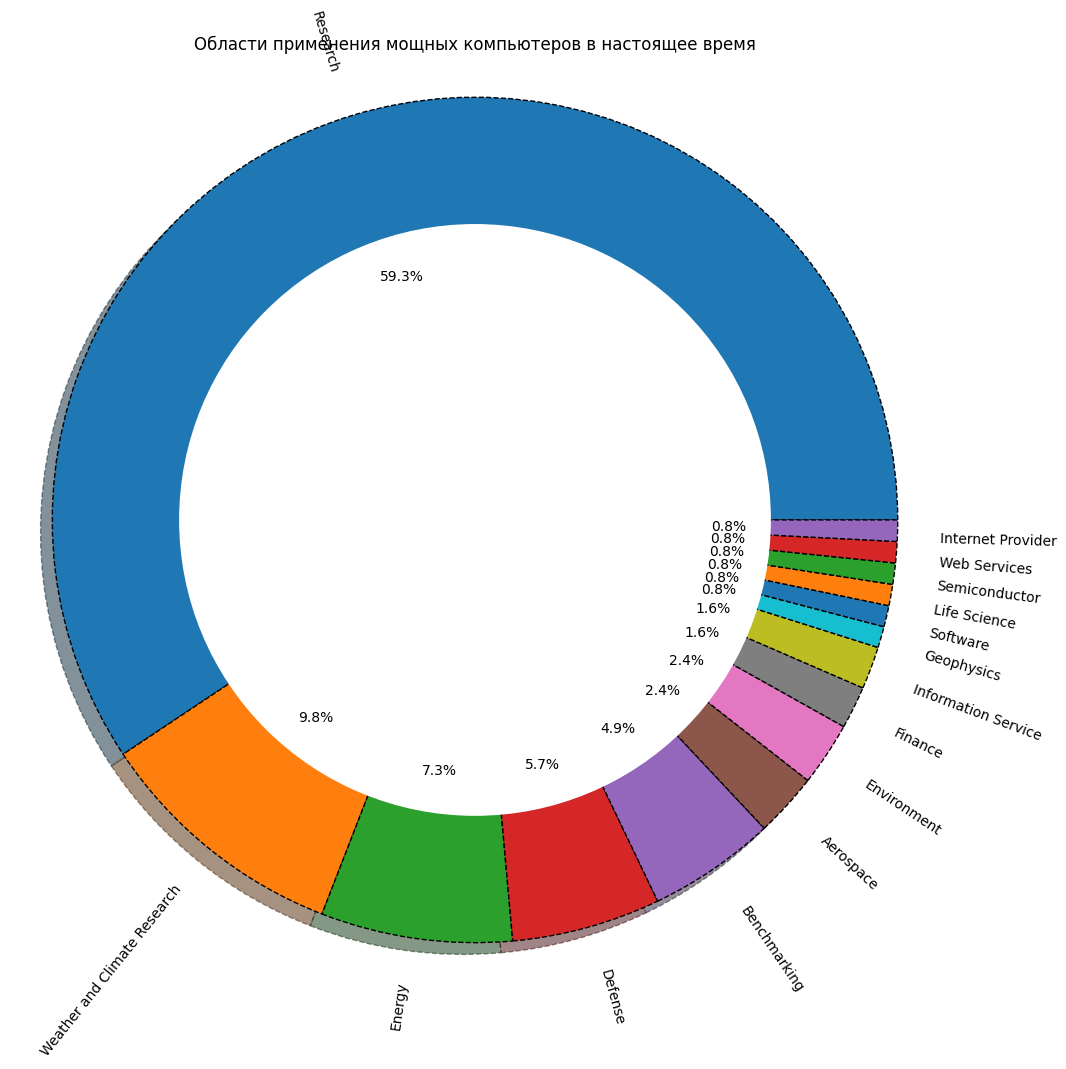

In [11]:
# Данные для построения круговой диаграммы (доли)
labels = df_2013['Application Area']
sizes = df_2013['System Share (%)']  # Процентные значения для каждой категории

# Создание круговой диаграммы
plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, 
        wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)

# # Опционально: добавление круга в центр диаграммы для обозначения общего значения
# plt.text(0, 0, 'Общее\nзначение', color='white', fontsize=12, ha='center')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Настройка аспекта равных осей, чтобы круг был кругом, а не эллипсом
plt.axis('equal')

# Опционально: добавление заголовка
plt.title('Области применения мощных компьютеров в настоящее время')

# Отображение диаграммы
plt.show()

### 2) Как изменились области применения суперкомпьютеров за последние 10 лет.

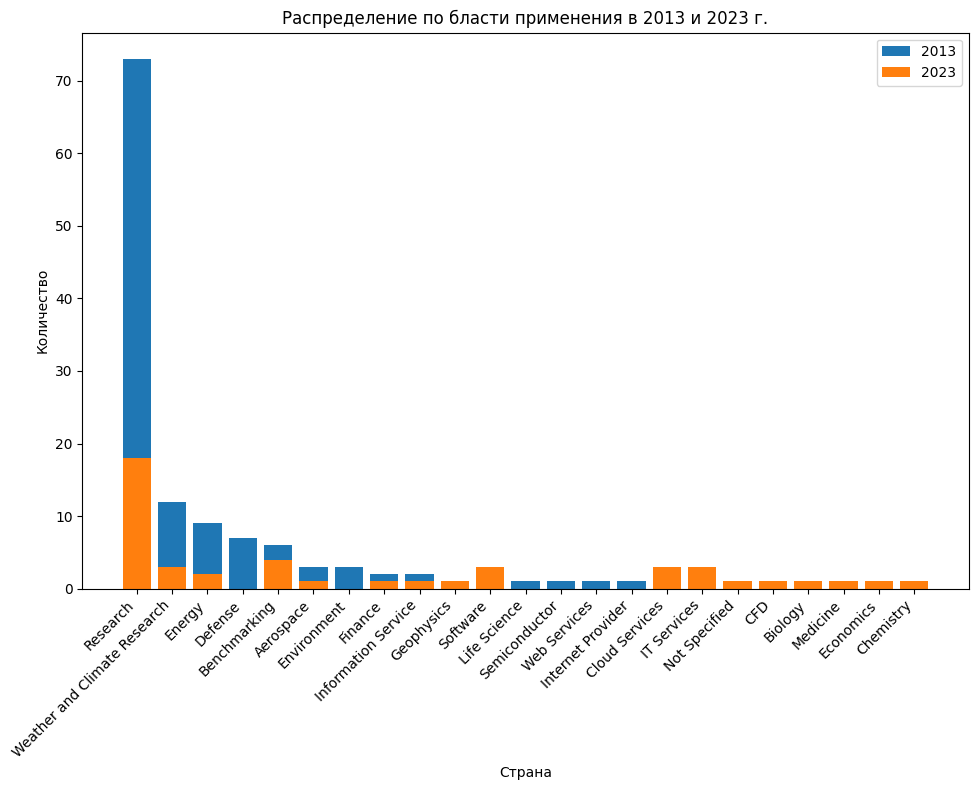

In [12]:
# Распредление количества стран, которые входили в топ 10 каждый  квартал
plt.figure(figsize=(10, 8))
# Строим гистограмму для одного из столбцов, так как все столбцы имеют одинаковые значения
plt.bar(df_2013['Application Area'], df_2013['Count'], label='2013')
plt.bar(df_2023['Application Area'], df_2023['Count'], label='2023')

plt.title('Распределение по бласти применения в 2013 и 2023 г.')
plt.legend()  # Добавляем легенду
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.legend()

# Показываем график
plt.show()